# MAIN CODE

# Workings

In [ ]:
import yfinance as yf
from datetime import datetime, timedelta, date
import pandas as pd
from matplotlib import pyplot as plt

Trying out for 1 stock and 1 date range first

In [ ]:
ticker = "SPY"
startDate = "2021-09-15"
endDate = "2022-01-13"

In [ ]:
def convert_date_to_correct_format(date):
    dateofint = datetime.strptime(date, '%Y-%m-%d')
    print(f"Date = {dateofint}")
    print(f"Weekday Number: {dateofint.weekday()}")
    if(dateofint.weekday() > 4):
        print(f"Is a Weekdend")
#         dateofint = dateofint - timedelta(days=2)
    return dateofint

In [ ]:
startDate = convert_date_to_correct_format(startDate)
endDate = convert_date_to_correct_format(endDate)

In [ ]:
tickerObject = yf.Ticker(ticker)
data = tickerObject.history(start=startDate, end=endDate)

In [ ]:
data

In [ ]:
closePricesDf = data['Close']
closePricesDf.name = ticker
closePricesDf

In [ ]:
print(list(data.index)[1])
print(pd.Timestamp(2021, 10, 5))

In [ ]:
print(startDate)
print(endDate)
pd.date_range(start=startDate, end=endDate)

In [ ]:
# # Covered below
# dd = pd.Timestamp(2022, 1, 15)
# holdingUpdateDf = pd.DataFrame(index = pd.date_range(start=startDate, end=dd))
# holdingUpdateDf = pd.merge(holdingUpdateDf, closePricesDf, how = 'left', left_index=True, right_index=True)
# holdingUpdateDf.head(10)

In [ ]:
# # Covered below
# holdingUpdateDf = holdingUpdateDf.fillna(method="ffill")
# # holdingUpdateDf.head(10)

In [ ]:
ticker_column_name = ticker + " Holdings"
ticker_column_name

In [ ]:
holdings = pd.read_csv('holdings.csv', index_col='Date', parse_dates=True, dayfirst=True)
holdings = holdings.sort_index()

In [ ]:
# holdings = pd.read_csv('holdings.csv', index_col='Date', parse_dates=True, dayfirst=True)
holdings['cumulative'] = holdings[ticker_column_name].cumsum()
# aaplHoldings.drop(['AAPL Holdings'])
holdings.drop(columns=[ticker_column_name], inplace = True)
holdings

In [ ]:
# dd = pd.Timestamp(2022, 1, 15)
holdingUpdateDf = pd.DataFrame(index = pd.date_range(start=startDate, end=endDate))
holdingUpdateDf = pd.merge(holdingUpdateDf, closePricesDf, how = 'left', left_index=True, right_index=True)
holdingUpdateDf.head(10)

holdingUpdateDf = holdingUpdateDf.fillna(method="ffill")

holdingUpdateDf = pd.merge(holdingUpdateDf, holdings, how = 'left', left_index=True, right_index=True)
holdingUpdateDf['invested'] = holdingUpdateDf['cumulative'] * holdingUpdateDf[ticker]
holdingUpdateDf = holdingUpdateDf.fillna(method="ffill")
holdingUpdateDf = holdingUpdateDf.fillna(0)
holdingUpdateDf

In [ ]:
valueDf = holdingUpdateDf.copy()
valueDf['value'] = valueDf[ticker]*valueDf['cumulative']
valueDf

In [ ]:
title = f'{ticker}: Value of Holdings & Amount Invested'
valueDf['value'].plot(label = "value", figsize=(16,8), title = title)
valueDf['invested'].plot(label = "invested")

plt.legend()
plt.show()

# For multiple from holdings file

In [1]:
import yfinance as yf
from datetime import datetime, timedelta, date
import pandas as pd
from matplotlib import pyplot as plt

# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
# pd.set_option('display.max_colwidth', -1)

In pseudocode, the different functions are:

```
Read in `holdings.csv`:
    Get the tickr
    Get (tickerHoldingDataFrame, startDate) from HandleAllocationDates()
For the tickr, get historical data from startDate to today.
Extract closing prices out of the data
Create empty dataframe from startDate to today
Merge closingPrices and forward fill for weekends
Create 'invested' column
Merge holdingData and forward fill for all days
Fillna with 0
Create value column in mainDF
Plot value and total invested


def HandleAllocationDates():
    Create df for ticker allocations
    Sort index
    Cumsum holdings
    return df, firstDate
```


In [2]:
# Holdings in a dataframe
holdings = pd.read_csv('holdings.csv', index_col='Date', parse_dates=True, dayfirst=True)
holdings = holdings.sort_index()
# holdings = holdings.fillna(0)
holdings

,TSLA,GME
Date,,
2021-01-01,1.0,NaN
2021-02-01,NaN,1.0
2021-03-01,1.0,NaN
2021-04-01,NaN,1.0
2021-05-01,1.0,NaN
2021-06-01,NaN,1.0
2021-07-01,1.0,NaN
2021-08-01,NaN,1.0
2021-09-01,1.0,NaN


In [3]:
tickers = list(holdings.columns)
startDate = holdings.index[0]
endDate = date.today()
print(startDate, endDate)

2021-01-01 00:00:00 2022-01-16


In [ ]:
holdingUpdateDf = pd.DataFrame(index = pd.date_range(start=startDate, end=endDate))

In [ ]:
# STOP

holdingUpdateDf = pd.DataFrame(index = pd.date_range(start=startDate, end=endDate))

for ticker in tickers:
    print(ticker)
    totalInvestedInTicker = 0
    
    newDf = pd.DataFrame(holdings[ticker])
    newDf = newDf.rename(columns = {ticker:f'purchase {ticker}'})
    newDf[f'cumulative {ticker}'] = newDf[f'purchase {ticker}'].cumsum()
#     newDf.drop(columns=[ticker], inplace = True)
#     newDf[[ticker]] = newDf[[ticker]].fillna(value=0)
    newDf.dropna(inplace = True)
    newDf = newDf[newDf[f'cumulative {ticker}'] != 0]
    print('newdf\n',newDf)
    
    # Get yfinance data
    tickerObject = yf.Ticker(ticker)
    data = tickerObject.history(start=startDate, end=endDate)
    closePricesDf = data['Close']
    closePricesDf.name = ticker
#     print(closePricesDf)


    holdingUpdateDf = pd.merge(holdingUpdateDf, closePricesDf, how = 'left', left_index=True, right_index=True)
    holdingUpdateDf = holdingUpdateDf.fillna(method="ffill")
    
    holdingUpdateDf = pd.merge(holdingUpdateDf, newDf, how = 'left', left_index=True, right_index=True)
    holdingUpdateDf[f'invested {ticker}'] = holdingUpdateDf[f'cumulative {ticker}'] * holdingUpdateDf[ticker]
    holdingUpdateDf[[f'purchase {ticker}']] = holdingUpdateDf[[f'purchase {ticker}']].fillna(value=0)
    holdingUpdateDf = holdingUpdateDf.fillna(method="ffill")
    holdingUpdateDf = holdingUpdateDf.fillna(0)
    
    holdingUpdateDf[f'value {ticker}'] = holdingUpdateDf[ticker] * holdingUpdateDf[f'cumulative {ticker}']
    
holdingUpdateDf

In [4]:
holdingUpdateDf = pd.DataFrame(index = pd.date_range(start=startDate, end=endDate))

for ticker in tickers:
    print(ticker)
    
    newDf = pd.DataFrame(holdings[ticker])
    newDf = newDf.rename(columns = {ticker:f'units bought of {ticker}'})
    newDf[f'cumulative {ticker}'] = newDf[f'units bought of {ticker}'].cumsum()
    newDf.dropna(inplace = True)
    newDf = newDf[newDf[f'cumulative {ticker}'] != 0]
    print('newdf\n',newDf)
    
    # Get yfinance data
    tickerObject = yf.Ticker(ticker)
    data = tickerObject.history(start=startDate, end=endDate)
    closePricesDf = data['Close']
    closePricesDf.name = ticker
#     print(closePricesDf)
    
    holdingUpdateDf = pd.merge(holdingUpdateDf, closePricesDf, how = 'left', left_index=True, right_index=True)
    holdingUpdateDf = holdingUpdateDf.fillna(method="ffill")
    
    holdingUpdateDf = pd.merge(holdingUpdateDf, newDf, how = 'left', left_index=True, right_index=True)
    holdingUpdateDf[f'cost of {ticker}'] = holdingUpdateDf[ticker] * holdingUpdateDf[f'units bought of {ticker}']
    holdingUpdateDf[f'total cost of {ticker}'] = holdingUpdateDf[f'cost of {ticker}'].cumsum()
    holdingUpdateDf[[f'units bought of {ticker}']] = holdingUpdateDf[[f'units bought of {ticker}']].fillna(value=0)
    holdingUpdateDf = holdingUpdateDf.fillna(method="ffill")
    holdingUpdateDf = holdingUpdateDf.fillna(value = 0)
    
    holdingUpdateDf[f'value of {ticker}'] = holdingUpdateDf[ticker] * holdingUpdateDf[f'cumulative {ticker}']
    
holdingUpdateDf    

TSLA
newdf
             units bought of TSLA  cumulative TSLA
Date                                             
2021-01-01                   1.0              1.0
2021-03-01                   1.0              2.0
2021-05-01                   1.0              3.0
2021-07-01                   1.0              4.0
2021-09-01                   1.0              5.0
2021-11-01                   1.0              6.0
GME
newdf
             units bought of GME  cumulative GME
Date                                           
2021-02-01                  1.0             1.0
2021-04-01                  1.0             2.0
2021-06-01                  1.0             3.0
2021-08-01                  1.0             4.0
2021-10-01                  1.0             5.0
2021-12-01                  1.0             6.0


,TSLA,units bought of TSLA,cumulative TSLA,cost of TSLA,total cost of TSLA,value of TSLA,GME,units bought of GME,cumulative GME,cost of GME,total cost of GME,value of GME
2021-01-01,0.000000,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
2021-01-02,0.000000,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
2021-01-03,0.000000,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
2021-01-04,729.770020,0.0,1.0,0.000000,0.000000,729.770020,17.250000,0.0,0.0,0.000000,0.000000,0.000000
2021-01-05,735.109985,0.0,1.0,0.000000,0.000000,735.109985,17.370001,0.0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-12,1106.219971,0.0,6.0,1208.589966,4048.469971,6637.319824,128.059998,0.0,6.0,179.839996,1183.339996,768.359985
2022-01-13,1031.560059,0.0,6.0,1208.589966,4048.469971,6189.360352,122.480003,0.0,6.0,179.839996,1183.339996,734.880020
2022-01-14,1049.609985,0.0,6.0,1208.589966,4048.469971,6297.659912,116.650002,0.0,6.0,179.839996,1183.339996,699.900009
2022-01-15,1049.609985,0.0,6.0,1208.589966,4048.469971,6297.659912,116.650002,0.0,6.0,179.839996,1183.339996,699.900009


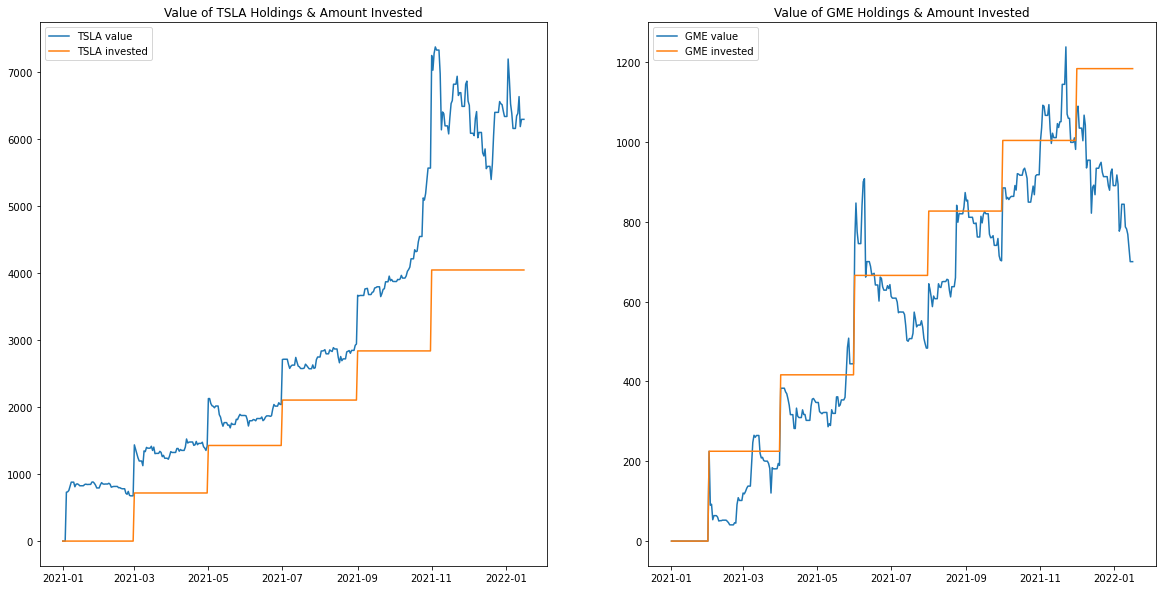

In [5]:
Tot = len(tickers)
Cols = 2

# Compute Rows required
Rows = Tot // Cols 
Rows += Tot % Cols

# Create a Position index
position = range(1,Tot + 1)

fig = plt.figure(1, figsize=(20,10))
for k in range(Tot):
    ticker = tickers[k]
    valLabel = f'{ticker} value'
    invLabel = f'{ticker} invested'
    ax = fig.add_subplot(Rows,Cols,position[k])
    ax.plot(holdingUpdateDf[f'value of {ticker}'], label=valLabel)      # Or whatever you want in the subplot
    ax.plot(holdingUpdateDf[f'total cost of {ticker}'], label=invLabel)
    ax.legend()
    title = f"Value of {ticker} Holdings & Amount Invested"
    plt.title(title)

# for ticker in tickers:
#     valLabel = f'{ticker} value'
#     invLabel = f'{ticker} invested'
#     holdingUpdateDf[f'value of {ticker}'].plot(label = valLabel, figsize = (16,8))
#     holdingUpdateDf[f'total cost of {ticker}'].plot(label = invLabel)


# plt.legend()
plt.show()

In [6]:
holdingUpdateDf['total invested'] = 0
holdingUpdateDf['total value'] = 0
for ticker in tickers:
    holdingUpdateDf['total invested'] += holdingUpdateDf[f'total cost of {ticker}']
    holdingUpdateDf['total value'] += holdingUpdateDf[f'value of {ticker}']
holdingUpdateDf

,TSLA,units bought of TSLA,cumulative TSLA,cost of TSLA,total cost of TSLA,value of TSLA,GME,units bought of GME,cumulative GME,cost of GME,total cost of GME,value of GME,total invested,total value
2021-01-01,0.000000,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2021-01-02,0.000000,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2021-01-03,0.000000,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2021-01-04,729.770020,0.0,1.0,0.000000,0.000000,729.770020,17.250000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,729.770020
2021-01-05,735.109985,0.0,1.0,0.000000,0.000000,735.109985,17.370001,0.0,0.0,0.000000,0.000000,0.000000,0.000000,735.109985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-12,1106.219971,0.0,6.0,1208.589966,4048.469971,6637.319824,128.059998,0.0,6.0,179.839996,1183.339996,768.359985,5231.809967,7405.679810
2022-01-13,1031.560059,0.0,6.0,1208.589966,4048.469971,6189.360352,122.480003,0.0,6.0,179.839996,1183.339996,734.880020,5231.809967,6924.240372
2022-01-14,1049.609985,0.0,6.0,1208.589966,4048.469971,6297.659912,116.650002,0.0,6.0,179.839996,1183.339996,699.900009,5231.809967,6997.559921
2022-01-15,1049.609985,0.0,6.0,1208.589966,4048.469971,6297.659912,116.650002,0.0,6.0,179.839996,1183.339996,699.900009,5231.809967,6997.559921


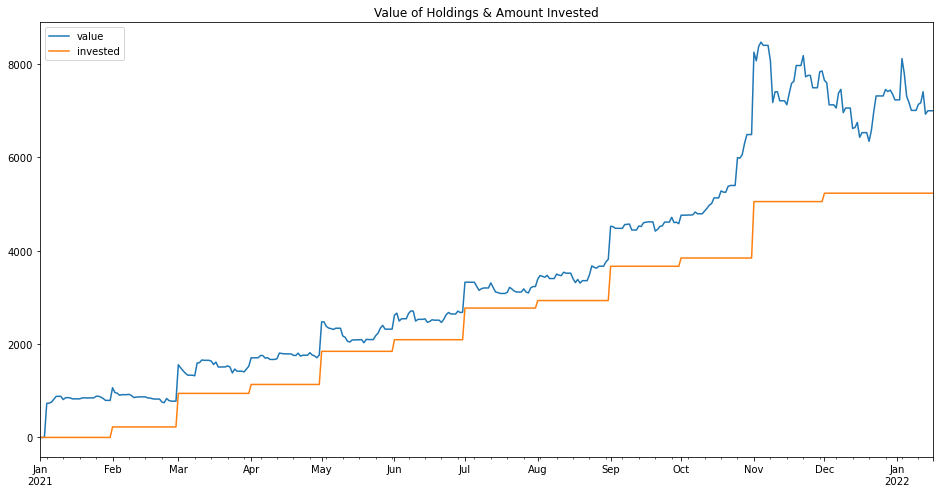

In [7]:
title = 'Value of Holdings & Amount Invested'
holdingUpdateDf['total value'].plot(label = "value", figsize=(16,8), title = title)
holdingUpdateDf['total invested'].plot(label = "invested")

plt.legend()
plt.show()

holdingUpdateDf.to_csv("holdings_updated.csv")